In [7]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# o dataset esta dividido em .hea(informacoes) e .dat(dados)
# esse formato é o wfdb

file_path = "records100/00000/00001_lr"  # caminho base (sem .hea/.dat)
# === Lê o arquivo .hea + .dat ===
record = wfdb.rdrecord(file_path)

# Mostra os canais disponíveis
print("Canais disponíveis:", record.sig_name)

# Matriz de sinais (amostras x canais)
dados = record.p_signal


Canais disponíveis: ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']


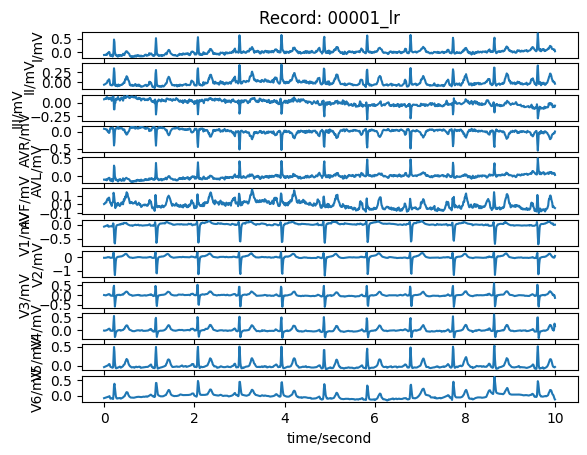

In [9]:
wfdb.plot.plot_wfdb(record)

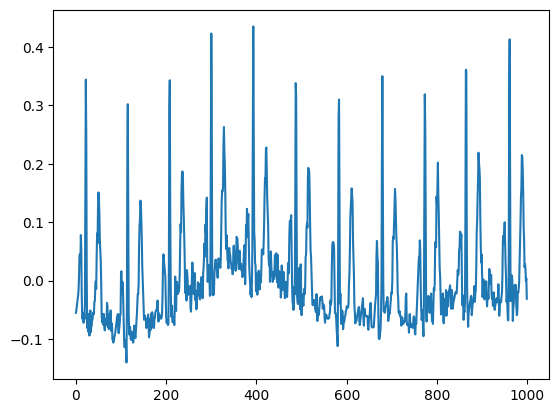

In [29]:
# pegar apenas 1 sinal e colocar ele como matrix numpy, o I
sI = np.array(dados[:,1])
plt.plot(sI)


In [30]:
# funcoes so para test(gpt)
tempo = np.linspace(0, 100, 100)
# I = np.cos(2 * np.pi * tempo * 10) + np.sin(2 * np.pi * tempo * 3)


def normalize_channel(x):
    min_ = x.min(axis=0, keepdims=True)
    max_ = x.max(axis=0, keepdims=True)
    return (x - min_) / (max_ - min_)

def mean(x):
    return x.mean(axis=0)

def std(x):
    return x.std(axis=0)

from scipy.stats import kurtosis

def kurtosis_signal(x): # ta dando algum erro
    return kurtosis(x, axis=0, fisher=False, bias=False)

def compute_fft2(x, fs): # fs = frequencia do sinal(depende se vai pegar do records100 ou records500)
    n = len(x)
    freqs = np.fft.rfftfreq(n, d=1/fs)    # Frequências de 0 até fs/2
    X = np.abs(np.fft.rfft(x))            # Magnitude do espectro
    return freqs, X

def invertse_fft2(x):
    return np.fft.irfft(x)


fs = record.fs  # Exemplo
x, y = compute_fft2(sI, fs)

In [31]:
# filtro que falou nos extratores
low, high = 0.5, 40
mask = (x >= low) & (x <= high)
print("freq min/max após máscara:", x[mask].min(), x[mask].max())
# filtro
fft_filtred, freq_filtred = y[mask], x[mask]
fft_norm = normalize_channel(fft_filtred)

freq min/max após máscara: 0.5 40.0


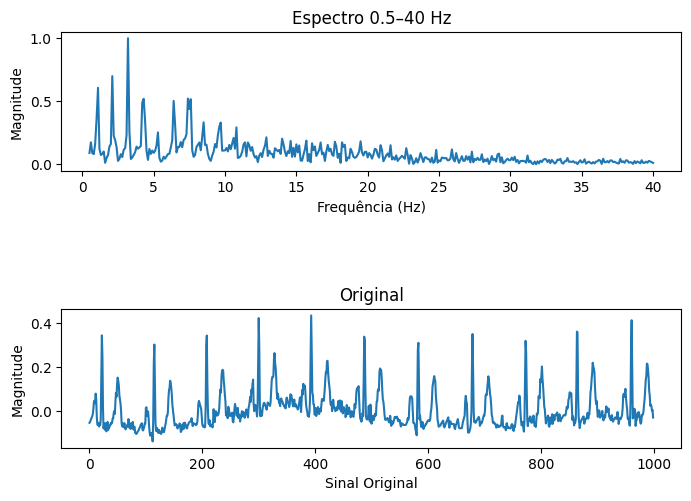

In [32]:

plt.figure(figsize=(8, 9))  # Aumentei a altura para acomodar os dois plots

# Primeiro plot (em cima)
plt.subplot(3, 1, 1)  # 2 linhas, 1 coluna, posição 1
plt.plot(freq_filtred, fft_norm, color='C0')
plt.title(f"Espectro {low}–{high} Hz")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")

plt.subplot(3, 1, 2)  # 2 linhas, 1 coluna, posição 2

plt.plot(sI , color='C0')
plt.title(f"Original")
plt.xlabel("Sinal Original")
plt.ylabel("Magnitude")


plt.subplots_adjust(hspace=1.0)  # Melhora o espaçamento entre os plots
plt.show()